# Tapşırıq 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\GULCIN NURALIZADA\Downloads\Pokemon.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 18 columns):
#                  800 non-null int64
name               800 non-null object
type1              800 non-null object
type2              416 non-null object
base_total         800 non-null int64
hp                 800 non-null int64
attack             800 non-null int64
defense            800 non-null int64
sp_attack          800 non-null int64
sp_defense         800 non-null int64
speed              800 non-null int64
height_m           780 non-null float64
weight_kg          780 non-null float64
is_legendary       800 non-null int64
generation         800 non-null int64
capture_rate       800 non-null int64
base_happiness     800 non-null int64
percentage_male    703 non-null float64
dtypes: float64(3), int64(12), object(3)
memory usage: 112.6+ KB


In [4]:
df.head()

,#,name,type1,type2,base_total,hp,attack,defense,sp_attack,sp_defense,speed,height_m,weight_kg,is_legendary,generation,capture_rate,base_happiness,percentage_male
0,1,Bulbasaur,grass,poison,318,45,49,49,65,65,45,0.7,6.9,0,1,45,70,88.1
1,2,Ivysaur,grass,poison,405,60,62,63,80,80,60,1.0,13.0,0,1,45,70,88.1
2,3,Venusaur,grass,poison,625,80,100,123,122,120,80,2.0,100.0,0,1,45,70,88.1
3,4,Charmander,fire,NaN,309,39,52,43,60,50,65,0.6,8.5,0,1,45,70,88.1
4,5,Charmeleon,fire,NaN,405,58,64,58,80,65,80,1.1,19.0,0,1,45,70,88.1


# Tapşırıq 2

In [ ]:
#pokemonun əsas növü

In [5]:
df['type1'].value_counts().sort_values(ascending=False).head(1)

water    114
Name: type1, dtype: int64

In [ ]:
#pokemonun 2- ci dərəcəli növü

In [6]:
df['type2'].value_counts().sort_values(ascending=False).head(1)

flying    94
Name: type2, dtype: int64

# Tapşırıq 3

In [7]:
df.head()

,#,name,type1,type2,base_total,hp,attack,defense,sp_attack,sp_defense,speed,height_m,weight_kg,is_legendary,generation,capture_rate,base_happiness,percentage_male
0,1,Bulbasaur,grass,poison,318,45,49,49,65,65,45,0.7,6.9,0,1,45,70,88.1
1,2,Ivysaur,grass,poison,405,60,62,63,80,80,60,1.0,13.0,0,1,45,70,88.1
2,3,Venusaur,grass,poison,625,80,100,123,122,120,80,2.0,100.0,0,1,45,70,88.1
3,4,Charmander,fire,NaN,309,39,52,43,60,50,65,0.6,8.5,0,1,45,70,88.1
4,5,Charmeleon,fire,NaN,405,58,64,58,80,65,80,1.1,19.0,0,1,45,70,88.1


In [15]:
type_stats = df.groupby('type1')['base_total'].agg(['mean', 'std']).reset_index()
threshold = 2
outliers = df.merge(type_stats, on='type1')
outliers['is_outlier'] = (outliers['base_total'] > (outliers['mean'] + threshold * outliers['std'])) | \
                        (outliers['base_total'] < (outliers['mean'] - threshold * outliers['std']))

print(outliers[outliers['is_outlier']][['name', 'type1', 'base_total']])

          name     type1  base_total
19     Sunkern     grass         180
23    Sceptile     grass         630
97       Ho-Oh      fire         680
154   Magikarp     water         200
192     Feebas     water         200
199     Kyogre     water         770
210     Palkia     water         680
359    Slaking    normal         670
386  Regigigas    normal         670
387     Arceus    normal         720
462      Pichu  electric         205
508    Groudon    ground         770
540    Xerneas     fairy         680
549    Tyrogue  fighting         210
556    Lucario  fighting         625
576     Mewtwo   psychic         780
635  Tyranitar      rock         700
663    Diancie      rock         700
680   Giratina     ghost         680
749  Poochyena      dark         220
771    Yveltal      dark         680


# Tapşırıq 4

In [9]:
df.head()

,#,name,type1,type2,base_total,hp,attack,defense,sp_attack,sp_defense,speed,height_m,weight_kg,is_legendary,generation,capture_rate,base_happiness,percentage_male
0,1,Bulbasaur,grass,poison,318,45,49,49,65,65,45,0.7,6.9,0,1,45,70,88.1
1,2,Ivysaur,grass,poison,405,60,62,63,80,80,60,1.0,13.0,0,1,45,70,88.1
2,3,Venusaur,grass,poison,625,80,100,123,122,120,80,2.0,100.0,0,1,45,70,88.1
3,4,Charmander,fire,NaN,309,39,52,43,60,50,65,0.6,8.5,0,1,45,70,88.1
4,5,Charmeleon,fire,NaN,405,58,64,58,80,65,80,1.1,19.0,0,1,45,70,88.1


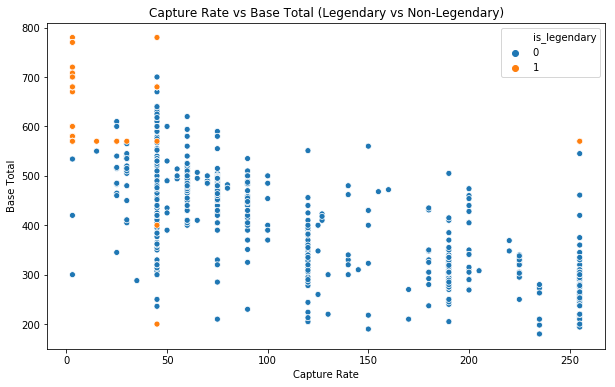

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='capture_rate', y='base_total', hue='is_legendary')
plt.xlabel("Capture Rate")
plt.ylabel("Base Total")

plt.show()

In [ ]:
# Scatter plot dan gorunduyu kimi base total gucu yuksek olanlarin tutulma sayi daha azdir. Eynile efsanevi pokemonlarin tutulma sayi da digerlerine nisbeten cox azdir

# Tapşırıq 5

In [22]:
yuksek_attack = df[df['attack'] == df['attack'].max()]
yuksek_attack['name']

213    Heracross
Name: name, dtype: object

# Tapşırıq 6

In [24]:
atributlar = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'base_total']

correlation_matrix = df[atributlar].corr()
print("base total ve diger atributlar arasinda korrelyasiya:")
print(correlation_matrix)

base total ve diger atributlar arasinda korrelyasiya:
                  hp    attack   defense  sp_attack  sp_defense     speed  \
hp          1.000000  0.411057  0.242244   0.366553    0.366867  0.161904   
attack      0.411057  1.000000  0.469471   0.367680    0.266277  0.351967   
defense     0.242244  0.469471  1.000000   0.242498    0.526251  0.008937   
sp_attack   0.366553  0.367680  0.242498   1.000000    0.512230  0.438082   
sp_defense  0.366867  0.266277  0.526251   0.512230    1.000000  0.227397   
speed       0.161904  0.351967  0.008937   0.438082    0.227397  1.000000   
base_total  0.621062  0.729998  0.630151   0.740986    0.717958  0.547575   

            base_total  
hp            0.621062  
attack        0.729998  
defense       0.630151  
sp_attack     0.740986  
sp_defense    0.717958  
speed         0.547575  
base_total    1.000000  


# Tapşırıq 7

In [28]:
from scipy import stats
legendary_attack = df[df['is_legendary'] == 1]['attack']
non_legendary_attack = df[df['is_legendary'] == 0]['attack']

t_statistic, p_value = stats.ttest_ind(legendary_attack, non_legendary_attack, equal_var=False)

alpha = 0.05

if p_value < alpha:
    print("Əfsanəvi və əfsanəvi olmayan Pokemonlarin orta hücumu arasında ciddi fərq var.")
else:
    print("Əfsanəvi və əfsanəvi olmayan Pokemonlarin orta hücumu arasında ciddi fərq yoxdur.")

Əfsanəvi və əfsanəvi olmayan Pokemonlarin orta hücumu arasında ciddi fərq var.


# Tapşırıq 8

In [30]:
df['type_combination'] = df['type1'] + ' - ' + df['type2']

top_combin = df['type_combination'].value_counts().head(10)

print("Top 10 en cox olan kombinasiyalar:")
print(top_combin)

Top 10 en cox olan kombinasiyalar:
normal - flying     26
grass - poison      14
bug - flying        13
bug - poison        11
water - ground       9
water - flying       7
rock - ground        6
psychic - flying     6
grass - flying       6
bug - grass          6
Name: type_combination, dtype: int64


# Tapşırıq 9

Korrelyasiya: 0.6266230704400672


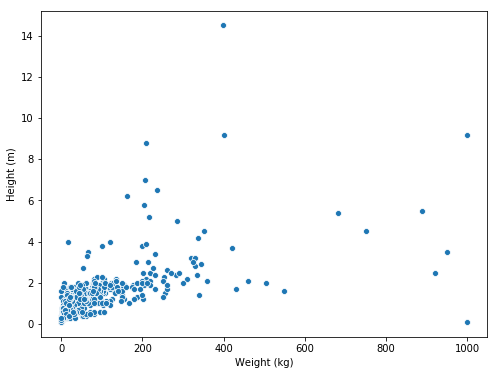

In [33]:
correlation = df['weight_kg'].corr(df['height_m'])
print('Korrelyasiya:', correlation)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='weight_kg', y='height_m')
plt.xlabel("Weight (kg)")
plt.ylabel("Height (m)")
plt.show()

In [34]:
# Gorunduyu kimi teqriben 0.63 korrelyasiya var. bu o demekdir ki beli boyu ve chekisi arasinda qismen korelyasiya var

# Tapşırıq 10

In [37]:
orta_suret = df.groupby('generation')['speed'].mean()


genin_en_suretlisi = orta_suret.idxmax()
orta_yuksek_suret = orta_suret.max()

print(f"Generation {genin_en_suretlisi} en yuksek orta surete malikdir, hansi ki  {orta_yuksek_suret:.2f} -dir.")

Generation 1 en yuksek orta surete malikdir, hansi ki  70.15 -dir.


# Tapşırıq 11

In [38]:
legendary_pokemon = df[df['is_legendary'] == 1]
non_legendary_pokemon = df[df['is_legendary'] == 0]

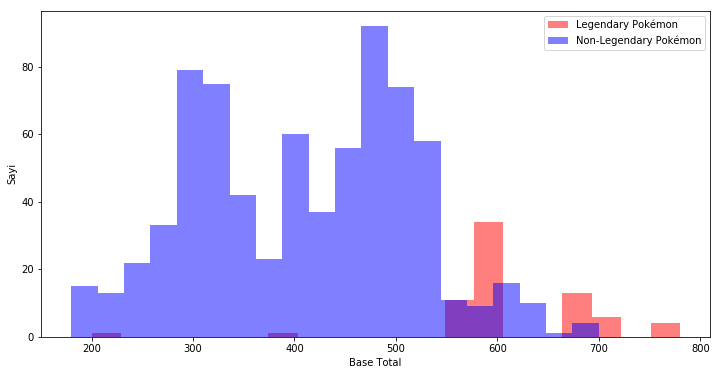

In [40]:
plt.figure(figsize=(12, 6))
plt.hist(legendary_pokemon['base_total'], bins=20, alpha=0.5, label='Legendary Pokémon', color='red')
plt.hist(non_legendary_pokemon['base_total'], bins=20, alpha=0.5, label='Non-Legendary Pokémon', color='blue')
plt.xlabel('Base Total')
plt.ylabel('Sayi')
plt.legend()
plt.show()

# Tapşırıq 12

In [45]:
from scipy.stats import f_oneway
pokemon_types = df['type1'].unique()
defense_values_by_type = [df[df['type1'] == type_]['defense'] for type_ in pokemon_types]
f_statistic, p_value = f_oneway(*defense_values_by_type)

alpha = 0.05

if p_value < alpha:
    print("Müxtəlif Pokémon növləri arasında Müdafiə paylanmasında əhəmiyyətli fərq var.")
else:
    print("Müxtəlif Pokémon növləri arasında Müdafiə paylanmasında əhəmiyyətli fərq yoxdur.")

Müxtəlif Pokémon növləri arasında Müdafiə paylanmasında əhəmiyyətli fərq var.


# Tapşırıq 13

In [46]:
pokemon_stats = df.set_index('name').to_dict(orient='index')

def get_pokemon_stats(name):
    if name in pokemon_stats:
        return pokemon_stats[name]
    else:
        return None

pokemon_name = "Pikachu"
stats = get_pokemon_stats(pokemon_name)
if stats is not None:
    print(f"{pokemon_name} uchun statistika: {stats}")
else:
    print(f"{pokemon_name} tapilmadi")

Pikachu uchun statistika: {'#': 25, 'type1': 'electric', 'type2': nan, 'base_total': 320, 'hp': 35, 'attack': 55, 'defense': 40, 'sp_attack': 50, 'sp_defense': 50, 'speed': 90, 'height_m': 0.4, 'weight_kg': 6.0, 'is_legendary': 0, 'generation': 1, 'capture_rate': 190, 'base_happiness': 70, 'percentage_male': 50.0, 'type_combination': nan}


# Tapşırıq 14

In [47]:
type_avg_faiz = df.groupby('type1')['percentage_male'].mean()

def boshlugu_doldur(row):
    if pd.isna(row['percentage_male']):
        return type_avg_faiz.get(row['type1'], None)
    return row['percentage_male']

df['percentage_male'] = df.apply(boshlugu_doldur, axis=1)

# Tapşırıq 15

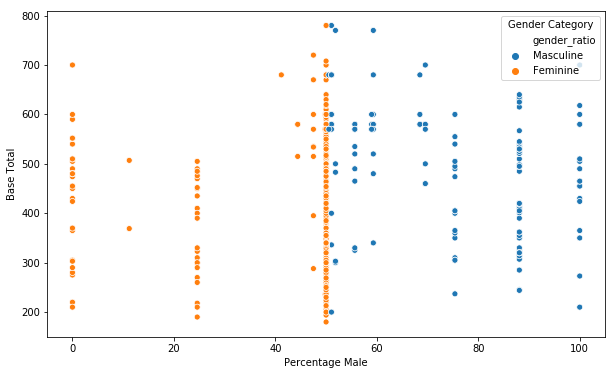

In [51]:
df['gender_ratio'] = df['percentage_male'].apply(lambda x: 'Masculine' if x > 50 else 'Feminine')


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='percentage_male', y='base_total', hue='gender_ratio')
plt.xlabel("Percentage Male")
plt.ylabel("Base Total")
plt.legend(title='Gender Category')
plt.show()

In [52]:
# Plotdan da gorunduyu kimi kisiye yaxin olan pokemonlar da qadina yaxin olanlar da texminen eyni choxluqda yayilmishidir. Bu o demekdir ki, cinsi ile Base total arasinda korrelyasiya yoxdur

# Tapşırıq 16

In [54]:
from scipy.stats import ttest_ind


weight_t_stat, weight_p_value = ttest_ind(legendary_pokemon['weight_kg'], non_legendary_pokemon['weight_kg'], equal_var=False)
height_t_stat, height_p_value = ttest_ind(legendary_pokemon['height_m'], non_legendary_pokemon['height_m'], equal_var=False)

alpha = 0.05


weight_difference_significant = weight_p_value < alpha
height_difference_significant = height_p_value < alpha


if weight_difference_significant:
    print("Əfsanəvi və əfsanəvi olmayan Pokémon arasında orta çəkilərdə əhəmiyyətli fərq var.")
else:
    print("Əfsanəvi və əfsanəvi olmayan Pokémon arasında orta çəkilərdə əhəmiyyətli fərq yoxdur.")

if height_difference_significant:
    print("Əfsanəvi və əfsanəvi olmayan Pokemon arasında orta hündürlükdə əhəmiyyətli fərq var.")
else:
    print("Əfsanəvi və əfsanəvi olmayan Pokemon arasında orta hündürlükdə əhəmiyyətli fərq yoxdur.")


Əfsanəvi və əfsanəvi olmayan Pokémon arasında orta çəkilərdə əhəmiyyətli fərq yoxdur.
Əfsanəvi və əfsanəvi olmayan Pokemon arasında orta hündürlükdə əhəmiyyətli fərq yoxdur.


# Tapşırıq 17

In [55]:
combine_gore_avg_xosh = df.groupby(['type1', 'type2'])['base_happiness'].mean()

xosh_type_combin = combine_gore_avg_xosh.idxmax()

print(f"En xoshbext kombinasiya {xosh_type_combin} -dir")

En xoshbext kombinasiya ('fire', 'steel') -dir


# Tapşırıq 18

In [56]:
average_weight_by_type = df.groupby('type1')['weight_kg'].mean()
average_height_by_type = df.groupby('type1')['height_m'].mean()

average_stats_by_type = pd.DataFrame({
    'Average Weight (kg)': average_weight_by_type,
    'Average Height (m)': average_height_by_type
})

print("Pokémon Tipine gore ortalama boy ve cheki:")
print(average_stats_by_type)

Pokémon Tipine gore ortalama boy ve cheki:
          Average Weight (kg)  Average Height (m)
type1                                            
bug                 33.083333            0.883333
dark                69.096552            1.296552
dragon             107.125926            1.937037
electric            37.944737            0.981579
fairy               23.555556            0.794444
fighting            58.675000            1.196429
fire                66.096000            1.168000
flying              52.000000            1.166667
ghost               69.570370            1.251852
grass               33.255844            0.938961
ground             150.044444            1.340741
ice                103.260870            1.208696
normal              46.158416            1.024752
poison              33.830000            1.160000
psychic             57.328846            1.063462
rock                94.270000            1.330000
steel              188.841667            1.875000
water  

# Tapşırıq 19

In [57]:
df.head(5)

,#,name,type1,type2,base_total,hp,attack,defense,sp_attack,sp_defense,...,height_m,weight_kg,is_legendary,generation,capture_rate,base_happiness,percentage_male,type_combination,gender_ratio_category,gender_ratio
0,1,Bulbasaur,grass,poison,318,45,49,49,65,65,...,0.7,6.9,0,1,45,70,88.1,grass - poison,Masculine,Masculine
1,2,Ivysaur,grass,poison,405,60,62,63,80,80,...,1.0,13.0,0,1,45,70,88.1,grass - poison,Masculine,Masculine
2,3,Venusaur,grass,poison,625,80,100,123,122,120,...,2.0,100.0,0,1,45,70,88.1,grass - poison,Masculine,Masculine
3,4,Charmander,fire,NaN,309,39,52,43,60,50,...,0.6,8.5,0,1,45,70,88.1,NaN,Masculine,Masculine
4,5,Charmeleon,fire,NaN,405,58,64,58,80,65,...,1.1,19.0,0,1,45,70,88.1,NaN,Masculine,Masculine


In [59]:
attack_threshold = 100
defense_threshold = 100
sp_attack_threshold = 100
sp_defense_threshold = 100
speed_threshold = 100


best_pokemon = df[
    (df['attack'] >= attack_threshold) &
    (df['defense'] >= defense_threshold) &
    (df['sp_attack'] >= sp_attack_threshold) &
    (df['sp_defense'] >= sp_defense_threshold) &
    (df['speed'] >= speed_threshold)
]

best_pokemon = best_pokemon.sort_values(by='base_total', ascending=False)

top_n = 1
print(best_pokemon[['name', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'base_total']].head(top_n))


         name  attack  defense  sp_attack  sp_defense  speed  base_total
383  Rayquaza     180      100        180         100    115         780


# Tapşırıq 20

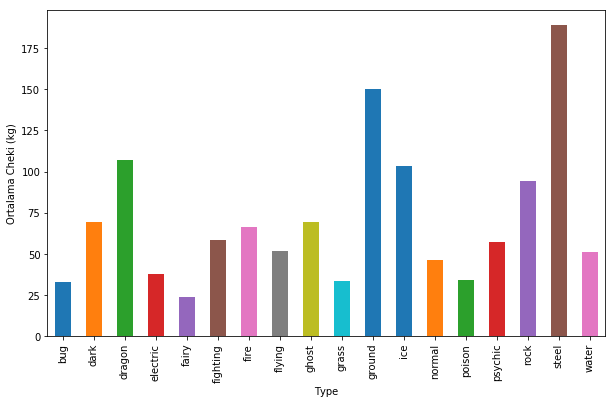

In [63]:
tipe_gore_orta_cheki = df.groupby('type1')['weight_kg'].mean()

plt.figure(figsize=(10, 6))
tipe_gore_orta_cheki.plot(kind='bar')
plt.xlabel("Type")
plt.ylabel("Ortalama Cheki (kg)")
plt.show()

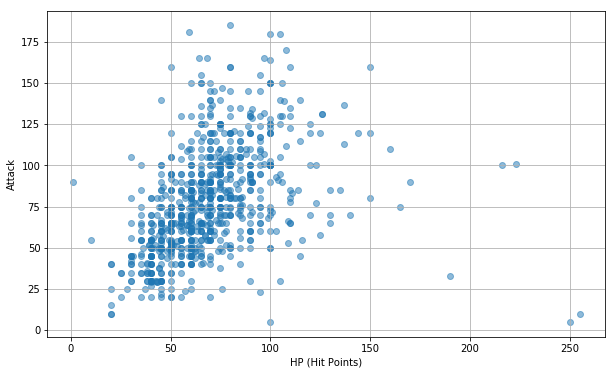

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(df['hp'], df['attack'], alpha=0.5)
plt.xlabel("HP (Hit Points)")
plt.ylabel("Attack")
plt.grid(True)
plt.show()

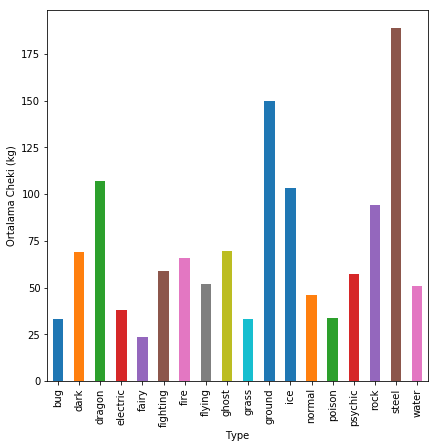

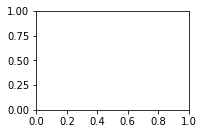

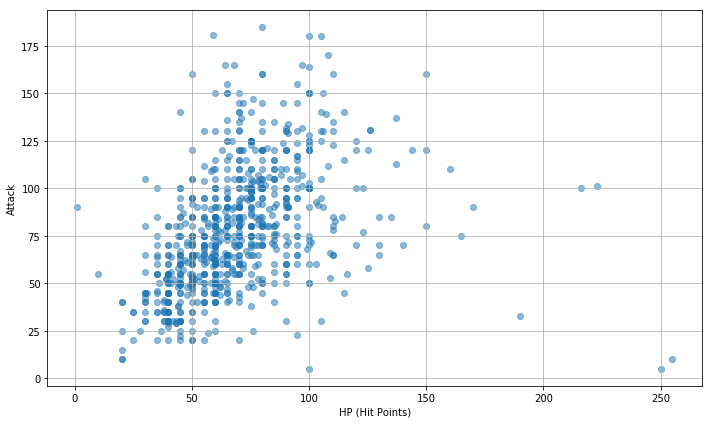

In [5]:
plt.figure(figsize=(15, 15))

tipe_gore_orta_cheki = df.groupby('type1')['weight_kg'].mean()
plt.subplot(2, 2, 1)
tipe_gore_orta_cheki.plot(kind='bar')
plt.xlabel("Type")
plt.ylabel("Ortalama Cheki (kg)")
plt.show()
plt.title("tipe_gore_orta_cheki")

plt.subplot(2, 2, 2)
plt.figure(figsize=(10, 6))
plt.scatter(df['hp'], df['attack'], alpha=0.5)
plt.xlabel("HP (Hit Points)")
plt.ylabel("Attack")
plt.grid(True)
plt.tight_layout()
plt.show()